# Water Features
#### by Brandon
When discussing surviving in an apocalypse, water resources is a key factor. While the household water supply might be cut, it's necessary to turn to public water features for help.

By searching through the WPRDC site, I selected a dataset recording water features in Pittsburgh.

I'm diving into the data to find which neighborhood has the best-equipped water features.

The initial step is determining which neighborhood has the most water features.

First things first, let's load the data into the pandas.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("WaterFeatures.csv",index_col="_id")
data.head(10)

id                                  name control_type  \
_id                                                                  
1    1816791851                        Able Long Park   Continuous   
2    1599892422               Albert Turk Graham Park       On/Off   
3    1422043278             Allegheny Commons Arch St   Continuous   
4    1237191582  Allegheny Commons East Tennis Courts   Continuous   
5    1146184773                Allegheny Commons Pool   Continuous   
6    1230448600                            Alton Park   Continuous   
7     887743707                   Ammon Park Building       On/Off   
8    1767127832                      Ammon Park Spray          NaN   
9     354464900                        Armstrong Park       On/Off   
10    495479912                  Armstrong Park Spray   Continuous   

          feature_type inactive              make  \
_id                                                 
1    Drinking Fountain        f  Regular Fountain   
2    Drinking Fountain        f   Most Dependable   
3    Drinking Fountain        f  Regular Fountain   
4    Drinking Fountain        f  Regular Fountain   
5    Drinking Fountain        f  Regular Fountain   
6    Drinking Fountain        f  Regular Fountain   
7    Drinking Fountain        f           Murdock   
8                Spray        f               NaN   
9    Drinking Fountain        f  Regular Fountain   
10               Spray        f               NaN   

                                                 image       neighborhood  \
_id                                                                         
1    https://tools.wprdc.org/images/pittsburgh/wate...          Beechview   
2    https://tools.wprdc.org/images/pittsburgh/wate...   Crawford-Roberts   
3    https://tools.wprdc.org/images/pittsburgh/wate...   Allegheny Center   
4    https://tools.wprdc.org/images/pittsburgh/wate...   Allegheny Center   
5    https://tools.wprdc.org/images/pittsburgh/wate...   Allegheny Center   
6    https://tools.wprdc.org/images/pittsburgh/wate...          Beechview   
7    https://tools.wprdc.org/images/pittsburgh/wate...  Bedford Dwellings   
8    https://tools.wprdc.org/images/pittsburgh/wate...  Bedford Dwellings   
9    https://tools.wprdc.org/images/pittsburgh/wate...   South Side Flats   
10   https://tools.wprdc.org/images/pittsburgh/wate...   South Side Flats   

     council_district  ward        tract  public_works_division  pli_division  \
_id                                                                             
1                   4    19  42003192000                      5            19   
2                   6     3  42003030500                      3             3   
3                   1    22  42003562700                      1            22   
4                   1    22  42003562700                      1            22   
5                   1    22  42003562700                      1            22   
6                   4    19  42003191600                      5            19   
7                   6     5  42003050900                      3             5   
8                   6     5  42003050900                      3             5   
9                   3    17  42003170200                      3            17   
10                  3    17  42003170200                      3            17   

     police_zone fire_zone   latitude  longitude  
_id                                               
1              6      4-28  40.408440 -80.028330  
2              2       2-1  40.440453 -79.984064  
3              1       1-7  40.454390 -80.008281  
4              1       1-6  40.450874 -80.001962  
5              1       1-6  40.451003 -80.001502  
6              6      4-28  40.414280 -80.021457  
7              2       2-5  40.449286 -79.977871  
8              2       2-5  40.449152 -79.978111  
9              3      4-24  40.428300 -79.986198  
10             3      4-24  40.428185 -79.986127

The first goal is to sort out different water features owned by different neighborhoods and compare the numbers of them.



I use pandas to count numbers of water features in different neighborhoods. 

Since some part of the dataset is missing, it is assumed that all features are available so all of them are counted.

In [3]:
test = data['neighborhood'].value_counts().sort_values(ascending=True)
test

Spring Garden           1
Fineview                1
Bluff                   1
Homewood South          1
Middle Hill             1
                       ..
Terrace Village         8
Allegheny Center        8
Bloomfield              8
Highland Park          12
Squirrel Hill South    14
Name: neighborhood, Length: 66, dtype: int64

Now we have a data frame containing only neighborhood names and counts, the next step is to plot it.

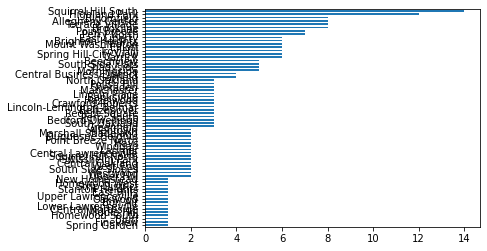

In [5]:
test.plot(kind = 'barh')

##### **Ouch**
The density of this bar chat is too high, it's hard to read anything from it www.

Luckily, we can now conclude that since there are obvious regional differences, the best neighborhood should be in the first 10 neighborhoods.

Text(0, 0.5, 'Neighborhood')

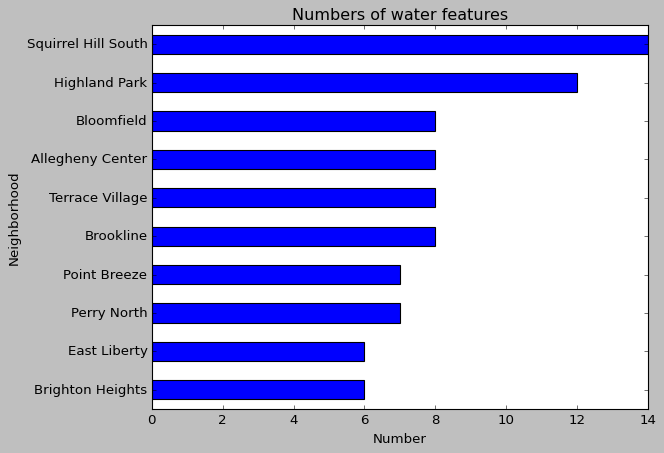

In [42]:
test1 = data['neighborhood'].value_counts().sort_values(ascending=True)
test1 = test1.iloc[56:66]
plt.style.use('fast')
test1.plot(kind = 'barh')
plt.title('Numbers of water features')
plt.xlabel("Number")
plt.ylabel("Neighborhood")

That's better now, the initial conclusion is now *Squirrel Hill South* owns most water facilities.

##### **However**

Isn't there any chance for *Highland Park* or *Bloomfield* to win?

Different kinds of water features' water quality are different, a drinking fountain is always better than a spray. Sometimes, quality beats quantity. So, it's necessary to take a deeper look into the data and balance between quality and quantity.

![Drinking Fountain](https://tools.wprdc.org/images/pittsburgh/water_features/Bud_Hammer_Park.jpg)
![Spray](https://tools.wprdc.org/images/pittsburgh/water_features/Chadwick_Park_Spray.jpg)

### Here comes the metric!

Since the neighborhood with the best water features is wanted, each facility in the neighborhood contributes more or less to the overall facilities. Therefore, points for each neighborhood are calculated accumlatively.

For each **Drinking Fountain**, add `+2` points to the neighborhood.

For each **Spray or other facilities**, add `+1` point to the neighborhood.

##### So，
The next step is to find out and calculate points for the best ten neighborhoods.

In [7]:
pointBoard = dict() #create a new dictionary

for index, row in data.iterrows():
    try: #for an recorded neighborhood, add points to it accordingly
        if row['feature_type'] == 'Drinking Fountain': pointBoard[row['neighborhood']]+= 2
        else: pointBoard[row['neighborhood']] += 1
    except: #for a new neighborhood, create a new entry 
        if row['feature_type'] == 'Drinking Fountain': pointBoard[row['neighborhood']]= 2
        else: pointBoard[row['neighborhood']] = 1
pointBoard

{'Beechview': 10,
 'Crawford-Roberts': 6,
 'Allegheny Center': 13,
 'Bedford Dwellings': 4,
 'South Side Flats': 8,
 'Banksville': 6,
 'Bloomfield': 15,
 'Bon Air': 2,
 'Central Oakland': 3,
 'Brighton Heights': 10,
 'Brookline': 15,
 'Hazelwood': 6,
 'Lincoln-Lemington-Belmar': 5,
 'Windgap': 3,
 'Troy Hill': 12,
 'Homewood West': 2,
 'Squirrel Hill South': 26,
 'Strip District': 2,
 'Stanton Heights': 2,
 'East Hills': 2,
 'Duquesne Heights': 3,
 'South Oakland': 5,
 'East Liberty': 9,
 'Highland Park': 23,
 'Garfield': 7,
 'Greenfield': 6,
 'Perry South': 6,
 'Point Breeze': 11,
 'Regent Square': 6,
 'Allentown': 4,
 'Hays': 4,
 'Elliott': 12,
 'Morningside': 8,
 'Central Northside': 2,
 'Terrace Village': 15,
 'Larimer': 3,
 'Carrick': 12,
 'Central Lawrenceville': 3,
 'Lincoln Place': 6,
 'Manchester': 6,
 'Marshall-Shadeland': 4,
 'Upper Lawrenceville': 2,
 'Sheraden': 6,
 'Beltzhoover': 6,
 'Shadyside': 10,
 'Mount Washington': 12,
 'Oakwood': 2,
 'Perry North': 14,
 'Upper Hill

Now, our next step is to plot the dictionary

Text(0, 0.5, 'Neighborhood')

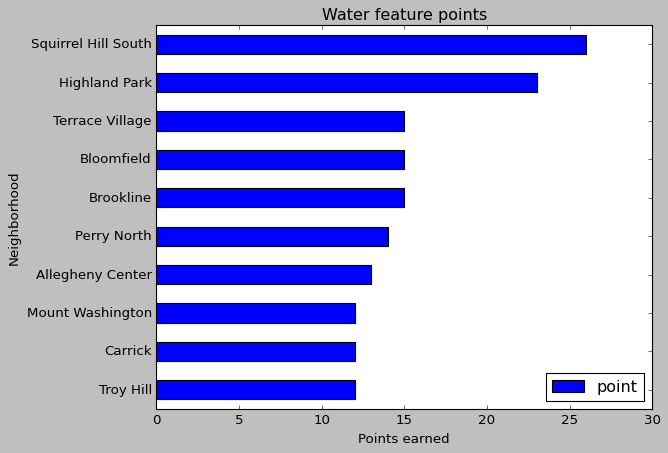

In [45]:
key = pointBoard.keys()
value = pointBoard.values()
# put the keys and values of the dictionary into a data frame
df = pd.DataFrame(value, key)
df.set_axis(['point'], axis = 'columns', inplace = True)

df = df.sort_values(by=['point'], ascending=True) # sort the data frame
df = df.iloc[56:66] #pick out the first ten

#set the style and labels to plot the dictionary
plt.style.use('fast')
df.plot(kind = 'barh')
plt.title('Water feature points')
plt.xlabel("Points earned")
plt.ylabel("Neighborhood")

### Conclusion:
Whether only considering the number of water facilities or considering water quality, *Squirrel Hill South* has done an outstanding job. So, I would conclude that *Squirrel Hill South* is the best neighborhood to survive in an apocalypse if you want enough water.